In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
from mpl_toolkits.mplot3d import axes3d, art3d

In [5]:
# w1x1 + w2x2 + b er linæer og kan ikke brukes til å predikere xor siden xor ikke er linæer separabel
class SigmoidModel:

    def __init__(self):
        self.W1 = torch.tensor([[0.0, 0.0], [0.0, 0.0]], requires_grad=True)
        self.b1 = torch.tensor([[0.0, 0.0]], requires_grad=True)
        self.W2 = torch.tensor([[0.0], [0.0]], requires_grad=True)
        self.b2 = torch.tensor([[0.0]], requires_grad=True)
        #self.W1 = torch.tensor([[1.0, -1.0], [1.0, -1.0]], requires_grad=True)
        #self.b1 = torch.tensor([[-0.5, 1.5]], requires_grad=True)
        #self.W2 = torch.tensor([[1.0], [1.0]], requires_grad=True)
        #self.b2 = torch.tensor([[-1.5]], requires_grad=True)

    def f1(self, x):
        return torch.sigmoid(x @ self.W1 + self.b1)

    def f2(self, x):
        return torch.sigmoid(x @ self.W2 + self.b2)

    # Predictor
    def f(self, x):
        return self.f2(self.f1(x))

    def f_viz(self, x):
        return (self.f2(self.f1(x).detach())).detach()


    # Uses Cross Entropy
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.f(x), y)

In [6]:
x_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y_train = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

In [39]:
learning_rate = 0.5
epochs = 10000

model = SigmoidModel()
optimizer = torch.optim.SGD([model.b1, model.W1, model.b2, model.W2], lr=learning_rate)

for epoch in range(epochs):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

In [40]:
print(f"W1 = {model.W1}, b1 = {model.b1}, W2 = {model.W2}, b2 = {model.b2}, loss = {model.loss(x_train, y_train)}")

W1 = tensor([[ 7.1006, -5.7301],
        [ 7.1006, -5.7301]], requires_grad=True), b1 = tensor([[-3.2044,  8.5869]], requires_grad=True), W2 = tensor([[9.3621],
        [9.4304]], requires_grad=True), b2 = tensor([[-14.1164]], requires_grad=True), loss = 0.5091000199317932


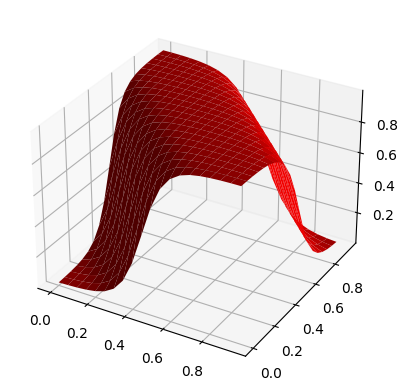

In [41]:
ax = plt.figure().add_subplot(projection="3d")

size = 20
x, y = torch.meshgrid(torch.arange(0, 1, 1 / size), torch.arange(0, 1, 1 / size))
z = torch.zeros([size, size])

for row in range(size):
    for col in range(size):
        z[row, col] = model.f_viz(torch.tensor([x[row, col], y[row, col]]))

ax.plot_surface(x, y, z, color="red")
plt.show()

In [50]:
# ikke konvergerer:
learning_rate = 0.5
epochs = 10000

model = SigmoidModel()
optimizer = torch.optim.SGD([model.b1, model.W1, model.b2, model.W2], lr=learning_rate)

for epoch in range(epochs):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

In [51]:
print(f"W1 = {model.W1}, b1 = {model.b1}, W2 = {model.W2}, b2 = {model.b2}, loss = {model.loss(x_train, y_train)}")

W1 = tensor([[0.0286, 0.0286],
        [0.0286, 0.0286]], requires_grad=True), b1 = tensor([[0.4017, 0.4017]], requires_grad=True), W2 = tensor([[-1.3547],
        [-1.3547]], requires_grad=True), b2 = tensor([[-2.5260]], requires_grad=True), loss = 0.6931771039962769


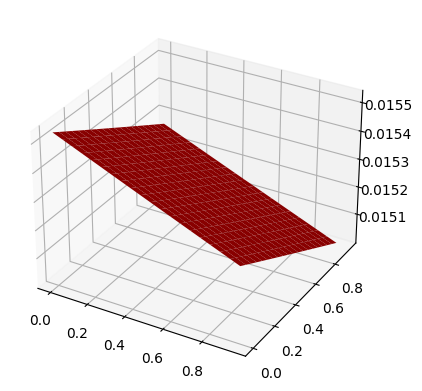

In [52]:
ax = plt.figure().add_subplot(projection="3d")

size = 20
x, y = torch.meshgrid(torch.arange(0, 1, 1 / size), torch.arange(0, 1, 1 / size))
z = torch.zeros([size, size])

for row in range(size):
    for col in range(size):
        z[row, col] = model.f_viz(torch.tensor([x[row, col], y[row, col]]))

ax.plot_surface(x, y, z, color="red")
plt.show()